Представим, что у нас есть датасет с признаками, которые сильно коррелируют, например, вес и рост для детей дошкольного возраста.

In [1]:
%matplotlib inline

import numpy as np

np.random.seed(42)

N_SAMPLES=50

def noise(delta, n=N_SAMPLES):
    return delta*np.random.randn(n)


age = np.random.randint(low=3, high=8, size=N_SAMPLES)
weight = np.round(3 + age*3+noise(2))
height = np.round(30+4*weight + noise(6))
print(list(zip(age,weight,height)))

[(6, 23.0, 118.0), (7, 22.0, 120.0), (5, 20.0, 102.0), (7, 25.0, 128.0), (7, 23.0, 122.0), (4, 13.0, 88.0), (5, 19.0, 117.0), (5, 17.0, 101.0), (5, 15.0, 92.0), (7, 23.0, 116.0), (6, 20.0, 101.0), (5, 18.0, 103.0), (7, 24.0, 127.0), (4, 17.0, 102.0), (6, 22.0, 122.0), (4, 15.0, 92.0), (6, 19.0, 97.0), (7, 26.0, 139.0), (3, 14.0, 85.0), (6, 26.0, 128.0), (4, 16.0, 92.0), (7, 27.0, 130.0), (6, 22.0, 116.0), (3, 12.0, 83.0), (3, 9.0, 64.0), (5, 19.0, 101.0), (5, 16.0, 92.0), (4, 14.0, 89.0), (6, 21.0, 106.0), (6, 20.0, 104.0), (5, 15.0, 91.0), (6, 19.0, 99.0), (6, 23.0, 134.0), (3, 13.0, 81.0), (5, 19.0, 101.0), (7, 24.0, 121.0), (5, 19.0, 103.0), (7, 24.0, 123.0), (3, 12.0, 65.0), (4, 17.0, 106.0), (6, 21.0, 114.0), (3, 10.0, 70.0), (6, 23.0, 127.0), (4, 17.0, 92.0), (4, 12.0, 73.0), (3, 13.0, 85.0), (4, 11.0, 74.0), (7, 26.0, 136.0), (4, 13.0, 82.0), (6, 23.0, 121.0)]


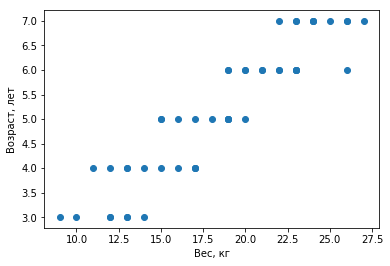

In [2]:
import matplotlib.pyplot as plt

plt.scatter(weight, age)
plt.xlabel('Вес, кг')
plt.ylabel('Возраст, лет');

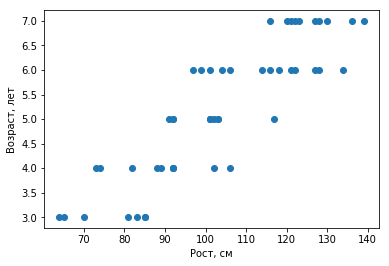

In [3]:
plt.scatter(height, age)
plt.xlabel('Рост, см')
plt.ylabel('Возраст, лет');

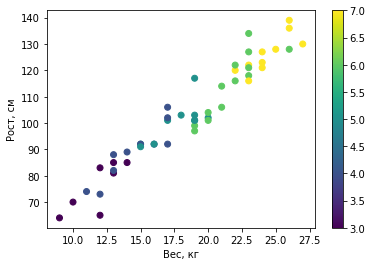

In [4]:
plt.scatter(weight, height, c=age)
plt.colorbar()
plt.xlabel('Вес, кг')
plt.ylabel('Рост, см');

In [5]:
from sklearn.linear_model import LinearRegression

X = np.stack([weight,height], axis=1)
y = age
reg = LinearRegression()
reg.fit(X,y);

In [6]:
reg.coef_, reg.intercept_

(array([ 0.30822571, -0.01214881]), 0.698239410145721)

In [7]:
X_ = np.append(X,[[15, 100]], axis=0)
y_ = np.append(y, [7], axis=0)
reg2 = LinearRegression()
reg2.fit(X_,y_)
reg2.coef_, reg2.intercept_

(array([0.21890344, 0.00854544]), 0.2713753459389183)

In [8]:
reg3 = LinearRegression()
reg3.fit(weight.reshape(-1,1), age)
reg3.coef_, reg3.intercept_

(array([0.2607132]), 0.32552022759398014)

In [9]:
reg4 = LinearRegression()
reg4.fit(np.append(weight, [15]).reshape(-1,1), np.append(age,[7]))
reg4.coef_, reg4.intercept_

(array([0.25203774]), 0.5406333460511226)

In [10]:
def bias(x,y):
    return abs(x-y)/min(x,y)*100

In [11]:
bias(reg.coef_[0], reg2.coef_[0])

40.80441519807458

In [12]:
bias(reg3.coef_[0], reg4.coef_[0])

3.44212827699725